<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Network-Propagation" data-toc-modified-id="Network-Propagation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Network Propagation</a></span><ul class="toc-item"><li><span><a href="#Uses:" data-toc-modified-id="Uses:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Uses:</a></span></li><li><span><a href="#Math" data-toc-modified-id="Math-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Math</a></span><ul class="toc-item"><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Random Walk</a></span></li><li><span><a href="#Heat-kernel" data-toc-modified-id="Heat-kernel-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Heat kernel</a></span></li></ul></li></ul></li><li><span><a href="#Grid-network" data-toc-modified-id="Grid-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Grid network</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Walk</a></span></li></ul></li><li><span><a href="#BA-network" data-toc-modified-id="BA-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BA network</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Walk</a></span></li></ul></li><li><span><a href="#Erdos-renyi" data-toc-modified-id="Erdos-renyi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Erdos-renyi</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Walk</a></span></li></ul></li><li><span><a href="#Costanzo" data-toc-modified-id="Costanzo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Costanzo</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Walk</a></span></li></ul></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from src.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from src.enm import Enm

In [4]:
os.chdir('../')

# Network Propagation
## Uses:
- Ranking of nodes given a prior labeling(e.g. disease genes)
- Module detection 
- Function prediction

## Math
### Random Walk
$$ p_t = Wp_{t-1}$$
where $W=AD^{-1}$
### Heat kernel
$$ p_t = e^{-tL} p_0 $$
where $L = D-A$

# Grid network

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


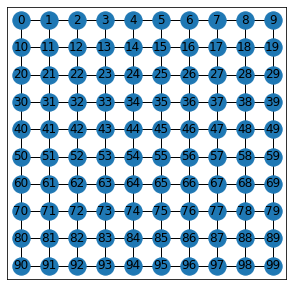

In [6]:
grd = nx.grid_2d_graph(10,10)
pos=dict((n,n) for n in grd.nodes)
labels = dict( ((i, j), i + (10-1-j) * 10 ) for i, j in grd.nodes() )
nx.draw_networkx(grd,pos=pos, labels=labels)

In [7]:
e_grd = Enm('grid')
e_grd.graph_gc=grd
e_grd.G=grd
e_grd.giant_component()
e_grd.gnm_analysis(no_diag=False)

@> 99 modes were calculated in 0.14s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [8]:
#np.fill_diagonal(e_grd.prs_mat,0.5)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


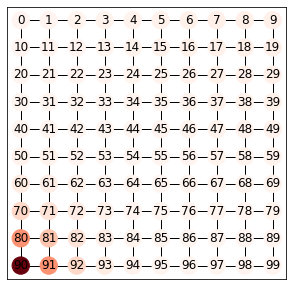

In [9]:
proj_prs = e_grd.prs_mat[[0],:].mean(axis=0)
nx.draw_networkx(grd,pos=pos, labels=labels, node_color=proj_prs, cmap=plt.cm.Reds)

In [10]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm, expm_multiply


def diffuse( matrix, heat_array, time):
    return expm_multiply(-matrix, heat_array, start=0, stop=time, endpoint=True)[-1]


In [77]:
rnd_grd = np.zeros(100)#[np.random.choice(5, 100)]
rnd_grd[0]=1
#rnd_grd[90]=1
#rnd_grd[19]=1
proj = diffuse(csc_matrix(e_grd.L), rnd_grd, time = 1)
proj_long = diffuse(csc_matrix(e_grd.L), rnd_grd, time = 10)
rwr = nx.pagerank(e_grd.G,personalization={(0,0):1})

In [64]:
max(proj_long)

0.010002188500374367

In [65]:
cmap = plt.get_cmap('Reds',10)
norm1 = mpl.colors.Normalize(vmin=0,vmax=1)
import matplotlib.cm as cm
m = cm.ScalarMappable(norm=norm1, cmap=cmap)



/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


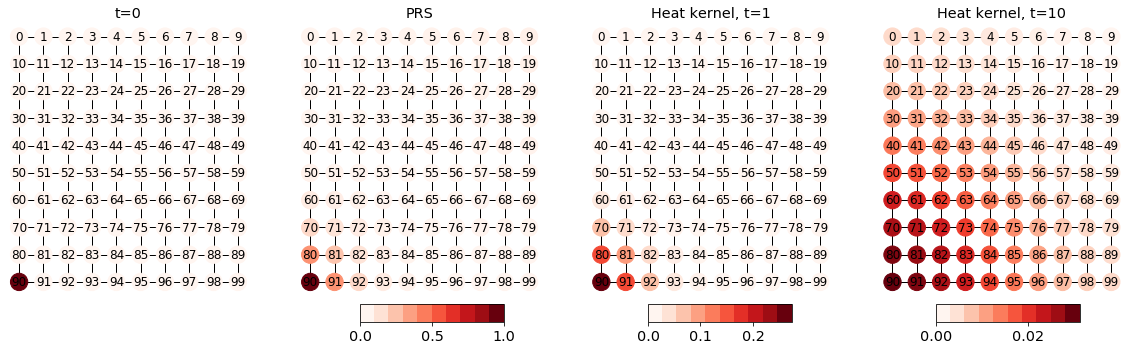

In [78]:
cmap = plt.get_cmap('Reds',10)
# norm1 = mpl.colors.Normalize(vmin=0,vmax=1)
# import matplotlib.cm as cm
# m = cm.ScalarMappable(norm=norm1, cmap=cmap)

fig, (ax0,ax1,ax2,ax3)= plt.subplots(1,4,figsize=(20,5))
nx.draw_networkx(grd,pos=pos, ax=ax0, labels=labels, node_color=rnd_grd, cmap=plt.cm.Reds)
nx.draw_networkx(grd,pos=pos, ax=ax1, labels=labels, node_color=proj_prs, cmap=plt.cm.Reds)
nx.draw_networkx(grd,pos=pos, ax=ax2, labels=labels, node_color=proj, cmap=plt.cm.Reds)
nx.draw_networkx(grd,pos=pos, ax=ax3, labels=labels, node_color=proj_long, cmap=plt.cm.Reds)
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax0.set_title('t=0')
ax1.set_title('PRS')
ax2.set_title('Heat kernel, t=1')
ax3.set_title('Heat kernel, t=10')

cax1 = plt.axes([0.37, 0.051, 0.1, 0.05])
norm1 = mpl.colors.Normalize(vmin=0,vmax=1)
cb1  = mpl.colorbar.ColorbarBase(cax1,cmap=cmap,norm=norm1,orientation='horizontal')

cax2 = plt.axes([0.57, 0.051, 0.1, 0.05])
norm2 = mpl.colors.Normalize(vmin=0,vmax=proj.max())
cb2  = mpl.colorbar.ColorbarBase(cax2,cmap=cmap,norm=norm2,orientation='horizontal')

cax3 = plt.axes([0.77, 0.051, 0.1, 0.05])
norm3 = mpl.colors.Normalize(vmin=0,vmax=proj_long.max())
cb3  = mpl.colorbar.ColorbarBase(cax3,cmap=cmap,norm=norm3,orientation='horizontal')

## Correlation

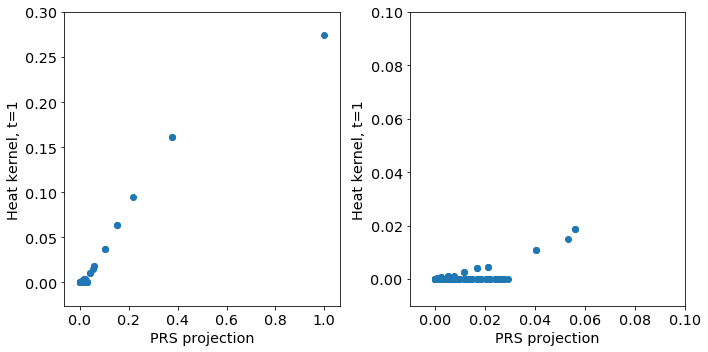

In [81]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
ax1.scatter(proj_prs,proj)
ax2.scatter(proj_prs,proj)
ax.scatter(proj_prs,proj_long)

ax1.set_xlabel('PRS projection')
ax2.set_xlabel('PRS projection')
ax1.set_ylabel('Heat kernel, t=1')
ax2.set_ylabel('Heat kernel, t=1')
ax2.set_xlim(-0.01,0.1)
ax2.set_ylim(-0.01,0.1)
fig.tight_layout()

In [ ]:
longer times

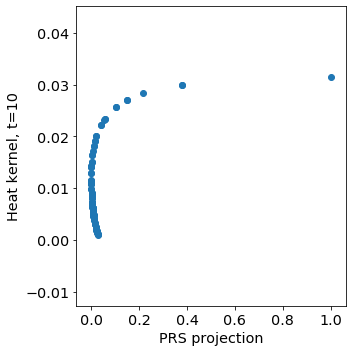

In [87]:
fig, (ax1)=plt.subplots(1,1,figsize=(5,5))
ax1.scatter(proj_prs,proj_long)
#ax2.scatter(proj_prs,proj_long)
ax1.set_xlabel('PRS projection')
#ax2.set_xlabel('PRS projection')
ax1.set_ylabel('Heat kernel, t=10')
ax2.set_ylabel('Heat kernel, t=10')
#ax2.set_xlim(-0.01,0.1)
#.ax2.set_ylim(0.01,0.035)
fig.tight_layout()

In [876]:
from scipy.stats import pearsonr, spearmanr
pearsonr([i for i in rwr.values()],proj)

(0.994340335524766, 3.0517045651023384e-97)

In [649]:
def random_walk(g, p0,step=1000):
    # let networkx return the adjacency matrix A
    A = nx.adj_matrix(g).todense()
    A = np.array(A, dtype = np.float64)
    # let's evaluate the degree matrix D
    D = np.diag(np.sum(A, axis=0))
    # ...and the transition matrix T
    T = np.dot(np.linalg.inv(D),A)
    # let's define the random walk length, say 10
    #walkLength = 100000
    # define the starting node, say the 0-th
    p = p0#.reshape(-1,1)
    #p = numpy.array([1, 0, 0, 0, 0]).reshape(-1,1)
    visited = list()
    for k in range(step):
        # evaluate the next state vector
        p = np.dot(T,p)
        # choose the node with higher probability as the visited node
        visited.append(np.argmax(p))
    return p

## Random Walk

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


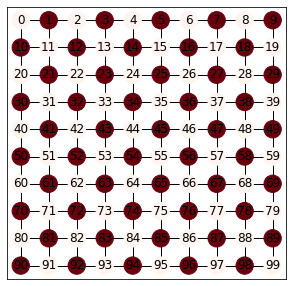

In [705]:
p = random_walk(grd,rnd_grd)
nx.draw_networkx(grd,pos=pos, labels=labels, node_color=p, cmap=plt.cm.Reds)


# BA network

In [758]:
ba = nx.barabasi_albert_graph(100,1)
pos = nx.spring_layout(ba)
e_ba = Enm('ba')
e_ba.graph_gc=ba
e_ba.G=grd
e_ba.giant_component()
e_ba.gnm_analysis(no_diag=False)

@> 99 modes were calculated in 0.04s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [759]:
#np.fill_diagonal(e_ba.prs_mat,0.5)
proj_prs = e_ba.prs_mat[[0],:].mean(axis=0)


In [17]:
rnd_grd = np.zeros(100)#[np.random.choice(5, 100)]
rnd_grd[0]=1
#rnd_grd[90]=1
#rnd_grd[19]=1
proj = diffuse(csc_matrix(e_ba.L), rnd_grd, time = 1)
proj_long = diffuse(csc_matrix(e_ba.L), rnd_grd, time = 500)


NameError: name 'e_ba' is not defined

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


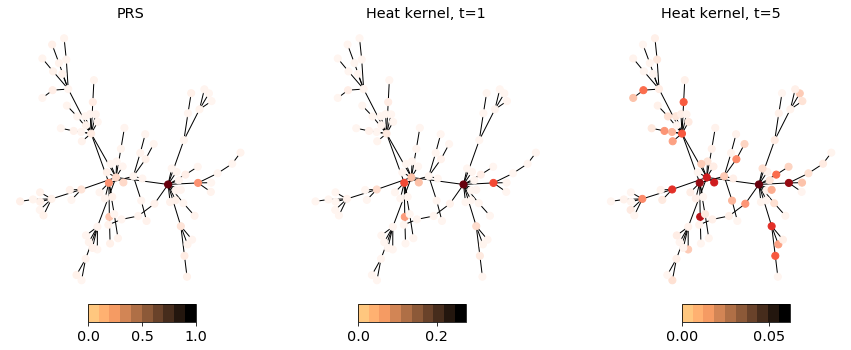

In [761]:
fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,5))
nx.draw_networkx(ba,pos=pos,ax=ax1 , node_color=proj_prs, cmap=plt.cm.Reds, with_labels=False, node_size=50)
nx.draw_networkx(ba,pos=pos,ax=ax2 , node_color=proj, cmap=plt.cm.Reds, with_labels=False, node_size=50)
nx.draw_networkx(ba,pos=pos,ax=ax3 , node_color=proj_long, cmap=plt.cm.Reds, with_labels=False, node_size=50)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title('PRS')
ax2.set_title('Heat kernel, t=1')
ax3.set_title('Heat kernel, t=5')
cmap = plt.get_cmap('copper_r',10)

cax1 = plt.axes([0.2, 0.051, 0.1, 0.05])
norm1 = mpl.colors.Normalize(vmin=0,vmax=proj_prs.max())
cb1  = mpl.colorbar.ColorbarBase(cax1,cmap=cmap,norm=norm1,orientation='horizontal')

cax2 = plt.axes([0.45, 0.051, 0.1, 0.05])
norm2 = mpl.colors.Normalize(vmin=0,vmax=proj.max())
cb2  = mpl.colorbar.ColorbarBase(cax2,cmap=cmap,norm=norm2,orientation='horizontal')

cax3 = plt.axes([0.75, 0.051, 0.1, 0.05])
norm3 = mpl.colors.Normalize(vmin=proj_long.max(),vmax=0)
cb3  = mpl.colorbar.ColorbarBase(cax3,cmap=cmap,norm=norm3,orientation='horizontal')

## Correlation

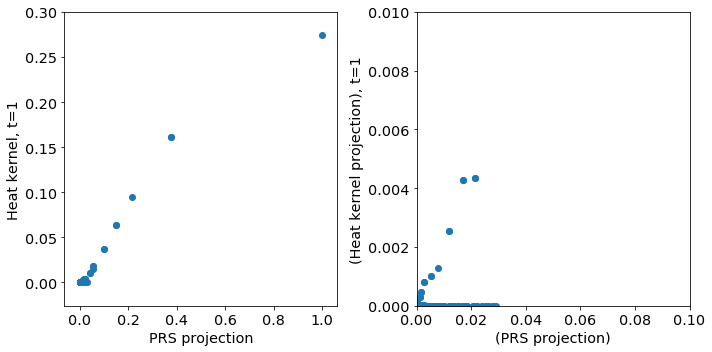

In [762]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(proj_prs,proj)
ax2.scatter((proj_prs),(proj))
ax1.set_xlabel('PRS projection')
ax2.set_xlabel('(PRS projection)')
ax1.set_ylabel('Heat kernel, t=1')
ax2.set_ylabel('(Heat kernel projection), t=1')
ax2.set_xlim(0,0.1)
ax2.set_ylim(0,0.01)
fig.tight_layout()

In [763]:
print(pearsonr(proj_prs,proj))
print(spearmanr(proj_prs,proj))

(0.9719000194967053, 2.255785210423554e-63)
SpearmanrResult(correlation=-0.12275100601913576, pvalue=0.2237242914276948)


## Random Walk

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


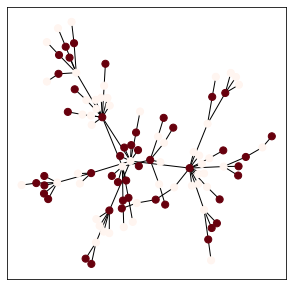

In [765]:
p = random_walk(ba,rnd_grd,step=1000)
nx.draw_networkx(ba,pos=pos, node_color=p, cmap=plt.cm.Reds, with_labels=False, node_size=50)


# Erdos-renyi

In [835]:
er = nx.erdos_renyi_graph(100,0.05,seed=1)
pos = nx.spring_layout(er)
e_er = Enm('er')
e_er.graph_gc=er
e_er.G=grd
e_er.giant_component()
e_er.gnm_analysis(no_diag=False)

@> 99 modes were calculated in 0.05s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [836]:
#np.fill_diagonal(e_er.prs_mat,0.5)
proj_prs = e_er.prs_mat[[0],:].mean(axis=0)


In [837]:
rnd_grd = np.zeros(100)#[np.random.choice(5, 100)]
rnd_grd[0]=1
#rnd_grd[90]=1
#rnd_grd[19]=1
proj = diffuse(csc_matrix(e_er.L), rnd_grd, time = 1)
proj_long = diffuse(csc_matrix(e_er.L), rnd_grd, time = 5)


/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


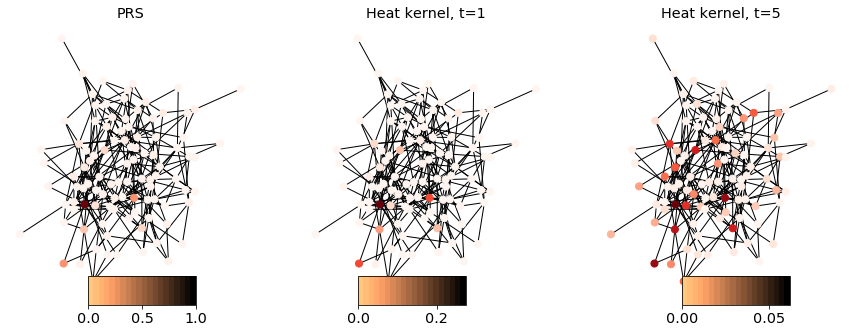

In [838]:
fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,5))
nx.draw_networkx(er,pos=pos,ax=ax1 , node_color=proj_prs, cmap=plt.cm.Reds, with_labels=False, node_size=50)
nx.draw_networkx(er,pos=pos,ax=ax2 , node_color=proj, cmap=plt.cm.Reds, with_labels=False, node_size=50)
nx.draw_networkx(er,pos=pos,ax=ax3 , node_color=proj_long, cmap=plt.cm.Reds, with_labels=False, node_size=50)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title('PRS')
ax2.set_title('Heat kernel, t=1')
ax3.set_title('Heat kernel, t=5')
cmap = plt.get_cmap('copper_r',20)

cax1 = plt.axes([0.2, 0.1, 0.1, 0.08])
norm1 = mpl.colors.Normalize(vmin=0,vmax=proj_prs.max())
cb1  = mpl.colorbar.ColorbarBase(cax1,cmap=cmap,norm=norm1,orientation='horizontal')

cax2 = plt.axes([0.45, 0.1, 0.1, 0.08])
norm2 = mpl.colors.Normalize(vmin=0,vmax=proj.max())
cb2  = mpl.colorbar.ColorbarBase(cax2,cmap=cmap,norm=norm2,orientation='horizontal')

cax3 = plt.axes([0.75, 0.1, 0.1, 0.08])
norm3 = mpl.colors.Normalize(vmin=0,vmax=proj_long.max())
cb3  = mpl.colorbar.ColorbarBase(cax3,cmap=cmap,norm=norm3,orientation='horizontal')

## Correlation

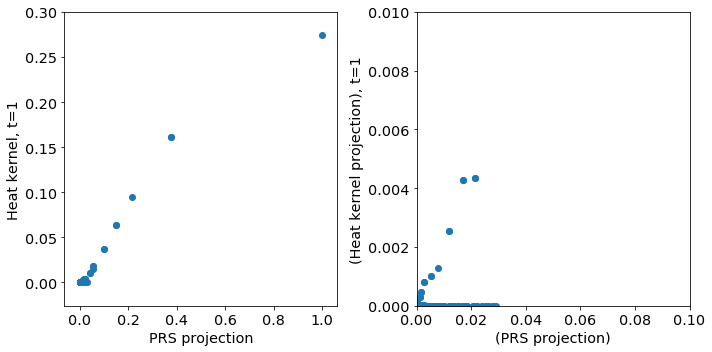

In [839]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(proj_prs,proj)
ax2.scatter((proj_prs),(proj))
ax1.set_xlabel('PRS projection')
ax2.set_xlabel('(PRS projection)')
ax1.set_ylabel('Heat kernel, t=1')
ax2.set_ylabel('(Heat kernel projection), t=1')
ax2.set_xlim(0,0.1)
ax2.set_ylim(0,0.01)
fig.tight_layout()

In [771]:
print(pearsonr(proj_prs,proj))
print(spearmanr(proj_prs,proj))

(0.9719000194967053, 2.255785210423554e-63)
SpearmanrResult(correlation=-0.12275100601913576, pvalue=0.2237242914276948)


## Random Walk

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


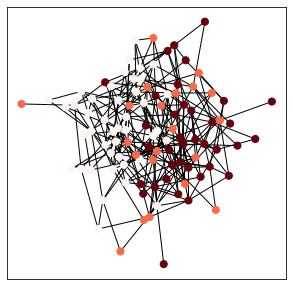

In [772]:
p = random_walk(er,rnd_grd)
nx.draw_networkx(er,pos=pos , node_color=p, cmap=plt.cm.Reds, with_labels=False, node_size=50)


# Costanzo

In [773]:
#e_pcc.spring_pos()

In [800]:
pos = e_pcc.graph_gc.nodes('pos')

In [801]:
#e_pcc.get_prs(no_diag=False)

In [802]:
#np.fill_diagonal(e_pcc.prs_mat,0.5)
proj_prs = e_pcc.prs_mat[[4914],:].mean(axis=0)


In [830]:
rnd_grd = np.zeros(len(e_pcc.graph_gc.nodes))#[np.random.choice(5, 100)]
rnd_grd[4914]=1
#rnd_grd[90]=1
#rnd_grd[19]=1
proj = diffuse(csc_matrix(e_pcc.L), rnd_grd, time = 1)
proj_long = diffuse(csc_matrix(e_pcc.L), rnd_grd, time = 3)


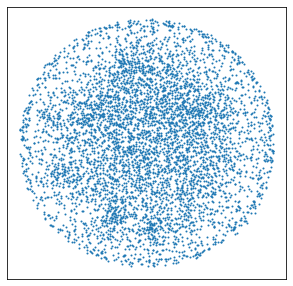

In [831]:
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,node_size=1)# , node_color=pcc_prs[:,4914]*100, cmap=plt.cm.Reds, with_labels=False, node_size=10)#pcc_prs[:,755])
#nx.draw_networkx_edges(e_pcc.graph_gc,pos=pos,alpha=.25,edge_size=1)

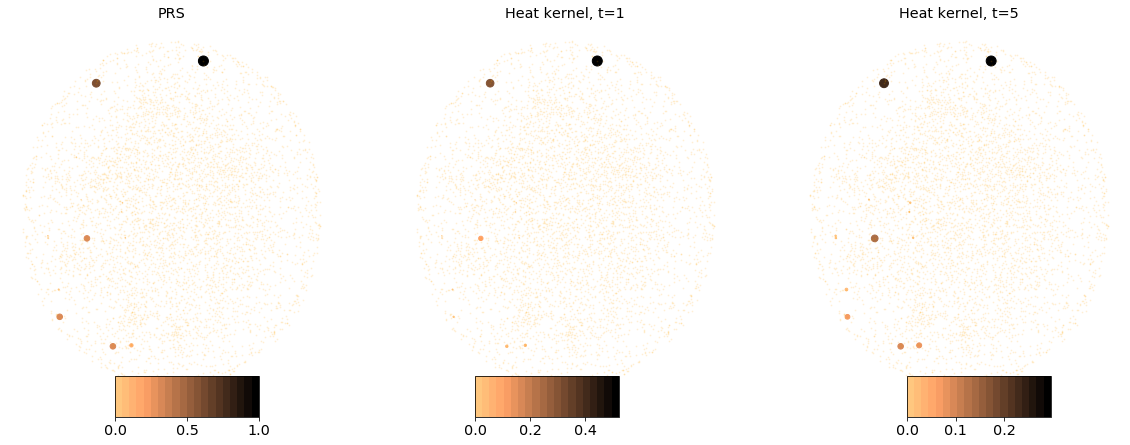

In [832]:
fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(20,7))
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,ax=ax1 , node_color=proj_prs, cmap=plt.cm.copper_r, with_labels=False, node_size=proj_prs*100/np.max(proj_prs))
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,ax=ax2 , node_color=proj, cmap=plt.cm.copper_r, with_labels=False, node_size=proj*100/np.max(proj))
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,ax=ax3 , node_color=proj_long, cmap=plt.cm.copper_r, with_labels=False, node_size=proj_long*100//np.max(proj_long))
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,node_size=1,ax=ax1, alpha=0.1,node_color='orange')
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,node_size=1,ax=ax2, alpha=0.1,node_color='orange')
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos,node_size=1,ax=ax3, alpha=0.1,node_color='orange')

ax1.set_facecolor('k')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title('PRS')
ax2.set_title('Heat kernel, t=1')
ax3.set_title('Heat kernel, t=5')
cmap = plt.get_cmap('copper_r',20)

cax1 = plt.axes([0.2, 0.1, 0.1, 0.08])
norm1 = mpl.colors.Normalize(vmin=0,vmax=proj_prs.max())
cb1  = mpl.colorbar.ColorbarBase(cax1,cmap=cmap,norm=norm1,orientation='horizontal')

cax2 = plt.axes([0.45, 0.1, 0.1, 0.08])
norm2 = mpl.colors.Normalize(vmin=0,vmax=proj.max())
cb2  = mpl.colorbar.ColorbarBase(cax2,cmap=cmap,norm=norm2,orientation='horizontal')

cax3 = plt.axes([0.75, 0.1, 0.1, 0.08])
norm3 = mpl.colors.Normalize(vmin=0,vmax=proj_long.max())
cb3  = mpl.colorbar.ColorbarBase(cax3,cmap=cmap,norm=norm3,orientation='horizontal')
#)

## Correlation

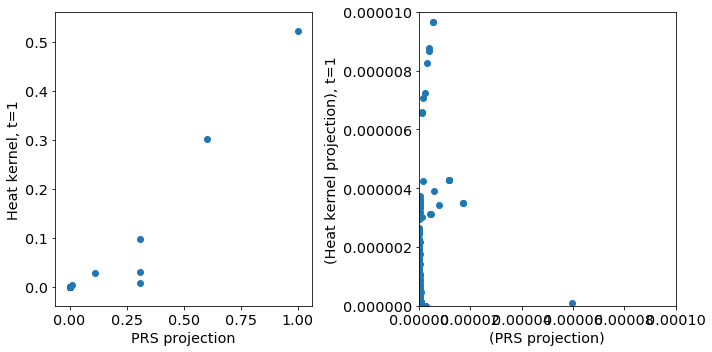

In [785]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(proj_prs,proj)
ax2.scatter((proj_prs),(proj))
ax1.set_xlabel('PRS projection')
ax2.set_xlabel('(PRS projection)')
ax1.set_ylabel('Heat kernel, t=1')
ax2.set_ylabel('(Heat kernel projection), t=1')
ax2.set_xlim(0,0.0001)
ax2.set_ylim(0,0.00001)
fig.tight_layout()

In [783]:
print(pearsonr(proj_prs,proj_long))
print(spearmanr(proj_prs,proj_long))

(0.981364956547559, 0.0)
SpearmanrResult(correlation=-0.9155677681914364, pvalue=0.0)


## Random Walk

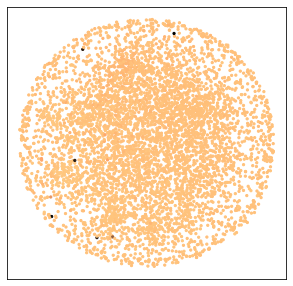

In [834]:
p = random_walk(e_pcc.graph_gc,rnd_grd,step=500)
nx.draw_networkx_nodes(e_pcc.graph_gc,pos=pos, node_color=p, cmap=plt.cm.copper_r, with_labels=False, node_size=5)


In [ ]:
# Investigate sensitivity distribution


In [574]:
pcc_prs = e_pcc.prs_mat

In [528]:
pcc_prs_norm = pcc_prs/pcc_prs.sum(axis=0,keepdims=1)

In [508]:
e_pcc.df.sort_values('sens')

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr,smallest_eigenvec
219,pau2,30,-0.003967,0.001643,0.002188,0.005999,0.000640,0.000344,0.000877,-0.002207,2.933424,0.204252,0.007628,0.048276,5.100431e-04,0.257146,-0.000524
490,ynl013c,23,-0.004606,-0.000328,0.001597,-0.003227,0.003588,0.002514,-0.002085,-0.000354,3.643750,0.206398,0.004833,0.055336,9.500759e-04,0.252092,-0.000539
534,ypl038w-a,51,-0.002127,0.002186,-0.006067,-0.002070,-0.000594,0.000531,0.000568,0.003599,2.922087,0.213029,0.008709,0.112941,6.308660e-05,0.275068,-0.000534
468,bio4,18,-0.002724,-0.001408,-0.000502,-0.004039,-0.005004,-0.012094,-0.005662,-0.003292,0.997363,0.224522,0.003567,0.052288,2.139617e-05,0.240565,-0.000475
1181,avt5,14,-0.004292,0.001650,0.008031,-0.000182,-0.000612,0.003156,0.002167,0.000165,0.536402,0.229461,0.002886,0.175824,5.233341e-04,0.249230,-0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,stp1,3,0.000988,0.018496,0.000067,0.004468,0.003094,0.001466,0.002644,-0.000380,4.457052,25.894583,0.001543,0.000000,7.304395e-12,0.117920,0.372104
4913,stp2,2,0.002108,0.001594,-0.000104,0.012430,0.007908,-0.000826,0.005730,0.000128,2.762648,31.644245,0.000386,0.000000,1.225169e-13,0.105488,0.428938
754,dal81,2,0.002108,0.001594,-0.000104,0.012430,0.007908,-0.000826,0.005730,0.000128,2.762648,31.644245,0.000386,0.000000,1.225156e-13,0.105488,0.428938
4914,rma1,1,-0.001621,-0.017052,0.000049,-0.009071,-0.005859,0.000266,-0.004391,-0.000030,1.670132,34.738685,0.000000,0.000000,2.054349e-15,0.095424,0.458295


In [530]:
np.var(pcc_prs_norm[:,755])

1.0008796058871453e-06

In [514]:
np.var(e_pcc.prs_mat[:,755])

0.001207837702226206

(array([4.419e+03, 3.370e+02, 1.670e+02, 1.030e+02, 4.600e+01, 4.700e+01,
        2.400e+01, 1.800e+01, 5.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

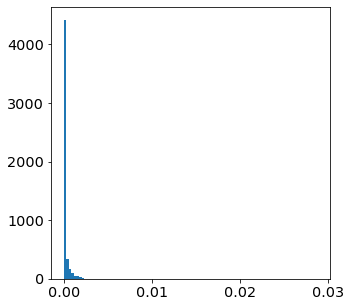

In [536]:
plt.hist(pcc_prs_norm[:,755],bins=100)

(array([4.847e+03, 7.700e+01, 4.700e+01, 2.300e+01, 1.800e+01, 1.500e+01,
        1.000e+01, 1.100e+01, 7.000e+00, 7.000e+00, 2.000e+00, 1.000e+01,
        1.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+0

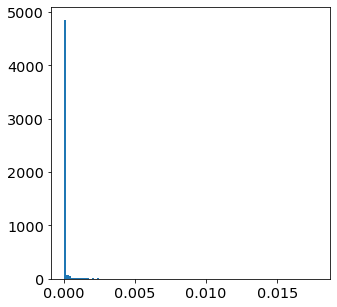

In [537]:
plt.hist(pcc_prs_norm[:,250], bins=100)

In [260]:
cov = e_grd.gnm.getCovariance()


array([[1.65405555, 0.62584065, 0.24883157, ..., 0.04206664, 0.04611064,
        0.04828298],
       [0.62584065, 0.98769848, 0.3564306 , ..., 0.04048326, 0.04414265,
        0.04611064],
       [0.24883157, 0.3564306 , 0.73290923, ..., 0.03754723, 0.04048326,
        0.04206664],
       ...,
       [0.04206664, 0.04048326, 0.03754723, ..., 0.73290923, 0.3564306 ,
        0.24883157],
       [0.04611064, 0.04414265, 0.04048326, ..., 0.3564306 , 0.98769848,
        0.62584065],
       [0.04828298, 0.04611064, 0.04206664, ..., 0.24883157, 0.62584065,
        1.65405555]])

In [263]:
from prody.utilities import importLA, div0

In [287]:
norm_prs_matrix = np.zeros((100, 100))
self_dp = np.diag(cov**2)  
self_dp = self_dp.reshape(100, 1)
re_self_dp = np.repeat(self_dp, 100, axis=1)
norm_prs_matrix = div0(cov**2, re_self_dp)

In [288]:
norm_prs_matrix

array([[1.        , 0.37836737, 0.15043725, ..., 0.02543242, 0.02787732,
        0.02919066],
       [0.63363533, 1.        , 0.36086985, ..., 0.04098747, 0.04469244,
        0.04668493],
       [0.33951213, 0.48632298, 1.        , ..., 0.0512304 , 0.05523639,
        0.05739679],
       ...,
       [0.05739679, 0.05523639, 0.0512304 , ..., 1.        , 0.48632298,
        0.33951213],
       [0.04668493, 0.04469244, 0.04098747, ..., 0.36086985, 1.        ,
        0.63363533],
       [0.02919066, 0.02787732, 0.02543242, ..., 0.15043725, 0.37836737,
        1.        ]])

In [283]:
proj

array([2.74342987e-01, 1.61589752e-01, 6.39167160e-02, 1.86761225e-02,
       4.29242378e-03, 8.09928326e-04, 1.29352927e-04, 1.78873366e-05,
       2.18136454e-06, 2.60490421e-07, 1.61589752e-01, 9.51773851e-02,
       3.76473496e-02, 1.10003542e-02, 2.52826472e-03, 4.77052901e-04,
       7.61896911e-05, 1.05357543e-05, 1.28483750e-06, 1.53430504e-07,
       6.39167160e-02, 3.76473496e-02, 1.48913834e-02, 4.35118256e-03,
       1.00005338e-03, 1.88697949e-04, 3.01367802e-05, 4.16741040e-06,
       5.08216593e-07, 6.06893308e-08, 1.86761225e-02, 1.10003542e-02,
       4.35118256e-03, 1.27139227e-03, 2.92210249e-04, 5.51365313e-05,
       8.80580597e-06, 1.21769503e-06, 1.48498170e-07, 1.77330978e-08,
       4.29242378e-03, 2.52826472e-03, 1.00005338e-03, 2.92210249e-04,
       6.71600980e-05, 1.26722963e-05, 2.02388107e-06, 2.79868751e-07,
       3.41300543e-08, 4.07568384e-09, 8.09928326e-04, 4.77052901e-04,
       1.88697949e-04, 5.51365313e-05, 1.26722963e-05, 2.39110867e-06,
      

In [ ]:
np.dot(array, np.dot(np.diag(self._vars), array.T))

In [297]:
expm(-e_grd.L).dot(rnd_grd)

array([2.74342987e-01, 1.61589752e-01, 6.39167160e-02, 1.86761225e-02,
       4.29242378e-03, 8.09928326e-04, 1.29352927e-04, 1.78873366e-05,
       2.18136454e-06, 2.60490421e-07, 1.61589752e-01, 9.51773851e-02,
       3.76473496e-02, 1.10003542e-02, 2.52826472e-03, 4.77052901e-04,
       7.61896911e-05, 1.05357543e-05, 1.28483750e-06, 1.53430504e-07,
       6.39167160e-02, 3.76473496e-02, 1.48913834e-02, 4.35118256e-03,
       1.00005338e-03, 1.88697949e-04, 3.01367802e-05, 4.16741040e-06,
       5.08216593e-07, 6.06893308e-08, 1.86761225e-02, 1.10003542e-02,
       4.35118256e-03, 1.27139227e-03, 2.92210249e-04, 5.51365313e-05,
       8.80580597e-06, 1.21769503e-06, 1.48498170e-07, 1.77330978e-08,
       4.29242378e-03, 2.52826472e-03, 1.00005338e-03, 2.92210249e-04,
       6.71600980e-05, 1.26722963e-05, 2.02388107e-06, 2.79868751e-07,
       3.41300543e-08, 4.07568384e-09, 8.09928326e-04, 4.77052901e-04,
       1.88697949e-04, 5.51365313e-05, 1.26722963e-05, 2.39110867e-06,
      

In [299]:
from scipy.linalg import eigh
eigh(e_grd.L)

(array([6.62752500e-16, 9.78869674e-02, 9.78869674e-02, 1.95773935e-01,
        3.81966011e-01, 3.81966011e-01, 4.79852979e-01, 4.79852979e-01,
        7.63932023e-01, 8.24429495e-01, 8.24429495e-01, 9.22316463e-01,
        9.22316463e-01, 1.20639551e+00, 1.20639551e+00, 1.38196601e+00,
        1.38196601e+00, 1.47985298e+00, 1.47985298e+00, 1.64885899e+00,
        1.76393202e+00, 1.76393202e+00, 2.00000000e+00, 2.00000000e+00,
        2.09788697e+00, 2.09788697e+00, 2.20639551e+00, 2.20639551e+00,
        2.38196601e+00, 2.38196601e+00, 2.61803399e+00, 2.61803399e+00,
        2.71592096e+00, 2.71592096e+00, 2.76393202e+00, 2.82442950e+00,
        2.82442950e+00, 3.00000000e+00, 3.00000000e+00, 3.17557050e+00,
        3.17557050e+00, 3.27345747e+00, 3.27345747e+00, 3.38196601e+00,
        3.38196601e+00, 3.44246348e+00, 3.44246348e+00, 3.55753652e+00,
        3.55753652e+00, 3.61803399e+00, 3.61803399e+00, 3.71592096e+00,
        3.71592096e+00, 3.90211303e+00, 3.90211303e+00, 4.000000

In [301]:
v, u = eigh(e_grd.L)

In [316]:
u.dot(expm(-np.diag(v)).dot(u.T))[0]

ValueError: shapes (99,100) and (99,100) not aligned: 100 (dim 1) != 99 (dim 0)

(99, 100)

In [327]:
u[:,1:].dot(np.diag(1/(v[1:]**2)).dot(u[:,1:].T))#[1]

array([[ 5.95474152,  5.31169107,  4.38722164, ..., -2.76674174,
        -2.9769004 , -3.08676733],
       [ 5.31169107,  5.03027209,  4.28247169, ..., -2.68504895,
        -2.87660867, -2.9769004 ],
       [ 4.38722164,  4.28247169,  4.00421877, ..., -2.52953509,
        -2.68504895, -2.76674174],
       ...,
       [-2.76674174, -2.68504895, -2.52953509, ...,  4.00421877,
         4.28247169,  4.38722164],
       [-2.9769004 , -2.87660867, -2.68504895, ...,  4.28247169,
         5.03027209,  5.31169107],
       [-3.08676733, -2.9769004 , -2.76674174, ...,  4.38722164,
         5.31169107,  5.95474152]])

In [333]:
cov_  = u[:,1:].dot(np.diag(1/(v[1:])).dot(u[:,1:].T))
cov_.dot(cov_)

array([[ 5.95474152,  5.31169107,  4.38722164, ..., -2.76674174,
        -2.9769004 , -3.08676733],
       [ 5.31169107,  5.03027209,  4.28247169, ..., -2.68504895,
        -2.87660867, -2.9769004 ],
       [ 4.38722164,  4.28247169,  4.00421877, ..., -2.52953509,
        -2.68504895, -2.76674174],
       ...,
       [-2.76674174, -2.68504895, -2.52953509, ...,  4.00421877,
         4.28247169,  4.38722164],
       [-2.9769004 , -2.87660867, -2.68504895, ...,  4.28247169,
         5.03027209,  5.31169107],
       [-3.08676733, -2.9769004 , -2.76674174, ...,  4.38722164,
         5.31169107,  5.95474152]])

In [335]:
cov**2

array([[1.65405555, 0.62584065, 0.24883157, ..., 0.04206664, 0.04611064,
        0.04828298],
       [0.62584065, 0.98769848, 0.3564306 , ..., 0.04048326, 0.04414265,
        0.04611064],
       [0.24883157, 0.3564306 , 0.73290923, ..., 0.03754723, 0.04048326,
        0.04206664],
       ...,
       [0.04206664, 0.04048326, 0.03754723, ..., 0.73290923, 0.3564306 ,
        0.24883157],
       [0.04611064, 0.04414265, 0.04048326, ..., 0.3564306 , 0.98769848,
        0.62584065],
       [0.04828298, 0.04611064, 0.04206664, ..., 0.24883157, 0.62584065,
        1.65405555]])

In [339]:
np.square(cov)

array([[1.65405555, 0.62584065, 0.24883157, ..., 0.04206664, 0.04611064,
        0.04828298],
       [0.62584065, 0.98769848, 0.3564306 , ..., 0.04048326, 0.04414265,
        0.04611064],
       [0.24883157, 0.3564306 , 0.73290923, ..., 0.03754723, 0.04048326,
        0.04206664],
       ...,
       [0.04206664, 0.04048326, 0.03754723, ..., 0.73290923, 0.3564306 ,
        0.24883157],
       [0.04611064, 0.04414265, 0.04048326, ..., 0.3564306 , 0.98769848,
        0.62584065],
       [0.04828298, 0.04611064, 0.04206664, ..., 0.24883157, 0.62584065,
        1.65405555]])

In [343]:
(u[:,1:]**2).dot((np.diag(1/(v[1:]))**2).dot((u[:,1:]**2).T))

array([[0.17374211, 0.13877682, 0.10349039, ..., 0.10349039, 0.13877682,
        0.17374211],
       [0.13877682, 0.12058139, 0.09429978, ..., 0.09429978, 0.12058139,
        0.13877682],
       [0.10349039, 0.09429978, 0.0839987 , ..., 0.0839987 , 0.09429978,
        0.10349039],
       ...,
       [0.10349039, 0.09429978, 0.0839987 , ..., 0.0839987 , 0.09429978,
        0.10349039],
       [0.13877682, 0.12058139, 0.09429978, ..., 0.09429978, 0.12058139,
        0.13877682],
       [0.17374211, 0.13877682, 0.10349039, ..., 0.10349039, 0.13877682,
        0.17374211]])

In [346]:
(np.diag(1/(v[1:]))**2).dot((u[:,1:]**2).T)

array([[1.21458300e+00, 9.32001441e-01, 4.97622059e-01, ...,
        4.97622059e-01, 9.32001441e-01, 1.21458300e+00],
       [2.85781389e+00, 2.76127143e+00, 2.58221527e+00, ...,
        2.58221527e+00, 2.76127143e+00, 2.85781389e+00],
       [9.93184562e-01, 8.08261466e-01, 5.09049612e-01, ...,
        5.09049612e-01, 8.08261466e-01, 9.93184562e-01],
       ...,
       [2.18445962e-09, 1.49898228e-07, 1.81765477e-06, ...,
        1.81765477e-06, 1.49898228e-07, 2.18445962e-09],
       [3.30354216e-06, 2.50998401e-05, 4.92622099e-05, ...,
        4.92622099e-05, 2.50998401e-05, 3.30354216e-06],
       [3.93305550e-07, 3.31252162e-06, 8.03591244e-06, ...,
        8.03591244e-06, 3.31252162e-06, 3.93305550e-07]])